In [1]:
!pip install python-avatars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 5.2 MB/s eta 0:00:00


In [2]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00


In [3]:
import python_avatars as pa
from IPython.display import Image as IPyImage
import random
import json
import numpy as np

In [4]:
def python_avatar_to_png_bytes(avatar):
    raw_png_bytes = cairosvg.svg2png(bytestring=avatar.render())
    pil_img = PIL.Image.open(BytesIO(raw_png_bytes)).convert("RGB")
    buf = BytesIO()
    pil_img.save(buf, format='PNG')
    return buf.getvalue()

In [5]:
import cairosvg
import PIL
from io import BytesIO

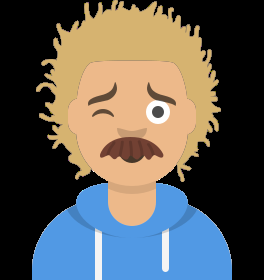

'{"Hair Type": "SHORT_DREADS_2", "Hair Color": "BLONDE_GOLDEN", "Facial Hair Type": "EINSTEIN_MOUSTACHE", "Eye Type": "WINK_WACKY", "Eyebrow Type": "FROWN_NATURAL", "Mouth Type": "DEFAULT", "Nose Type": "WIDE", "Skin Color": "LIGHT", "Clothing Type": "HOODIE", "Clothing Color": "BLUE_02", "Background Color": "DEFAULT", "Avatar Style": "TRANSPARENT"}'

In [6]:
# Define all traits
traits = {
    "Hair Type": list(pa.HairType),
    "Hair Color": list(pa.HairColor),
    "Facial Hair Type": list(pa.FacialHairType),
    "Eye Type": list(pa.EyeType),
    "Eyebrow Type": list(pa.EyebrowType),
    "Mouth Type": list(pa.MouthType),
    "Nose Type": list(pa.NoseType),
    "Skin Color": list(pa.SkinColor),
    "Clothing Type": list(pa.ClothingType),
    "Clothing Color": list(pa.ClothingColor),
    "Background Color": [list(pa.BackgroundColor)[0]],
    "Avatar Style": [list(pa.AvatarStyle)[0]]
}


def generate_random_python_avatar():

  selected_traits = {k: random.choice(v) for k, v in traits.items()}

  # Create avatar
  avatar = pa.Avatar(
      style=selected_traits["Avatar Style"],
      top=selected_traits["Hair Type"],
      hair_color=selected_traits["Hair Color"],
      mouth=selected_traits["Mouth Type"],
      eyes=selected_traits["Eye Type"],
      nose=selected_traits["Nose Type"],
      eyebrows=selected_traits["Eyebrow Type"],
      skin_color=selected_traits["Skin Color"],
      clothing=selected_traits["Clothing Type"],
      clothing_color=selected_traits["Clothing Color"],
      background_color=selected_traits["Background Color"],
      facial_hair=selected_traits["Facial Hair Type"]
  )

  avatar_data = {k: v.name for k, v in selected_traits.items()}
  return (python_avatar_to_png_bytes(avatar),json.dumps(avatar_data))

random_avatar = generate_random_python_avatar()
display(IPyImage(random_avatar[0]))
display(random_avatar[1])

In [7]:
def png_bytes_to_rgb_vector (pngbytes):
  data = np.array(PIL.Image.open(BytesIO(pngbytes)).convert('RGB')).flatten()
  return data
avatar = pa.Avatar()
pngbytes = python_avatar_to_png_bytes(avatar)
png_bytes_to_rgb_vector(pngbytes)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [8]:
from sklearn.neighbors import NearestNeighbors

First avatar:


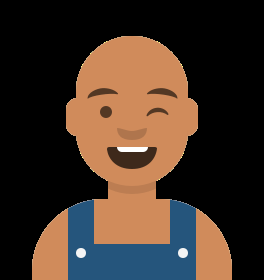

Traits: {"Hair Type": "NONE", "Hair Color": "BLONDE", "Facial Hair Type": "NONE", "Eye Type": "WINK", "Eyebrow Type": "DEFAULT_NATURAL", "Mouth Type": "BIG_SMILE", "Nose Type": "WIDE", "Skin Color": "BROWN", "Clothing Type": "OVERALL", "Clothing Color": "BLUE_03", "Background Color": "DEFAULT", "Avatar Style": "TRANSPARENT"}
5 nearest neighbors:


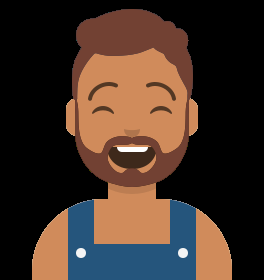

Traits: {"Hair Type": "SHORT_CURLY", "Hair Color": "BROWN", "Facial Hair Type": "BEARD_LIGHT", "Eye Type": "HAPPY", "Eyebrow Type": "RAISED_EXCITED", "Mouth Type": "BIG_SMILE", "Nose Type": "SMALL", "Skin Color": "BROWN", "Clothing Type": "OVERALL", "Clothing Color": "BLUE_03", "Background Color": "DEFAULT", "Avatar Style": "TRANSPARENT"}


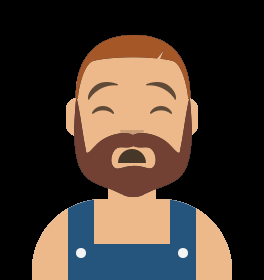

Traits: {"Hair Type": "CAESAR_SIDE_PART", "Hair Color": "AUBURN", "Facial Hair Type": "BEARD_MEDIUM", "Eye Type": "HAPPY", "Eyebrow Type": "RAISED_EXCITED_NATURAL", "Mouth Type": "DISBELIEF", "Nose Type": "DEFAULT", "Skin Color": "LIGHT", "Clothing Type": "OVERALL", "Clothing Color": "BLUE_03", "Background Color": "DEFAULT", "Avatar Style": "TRANSPARENT"}


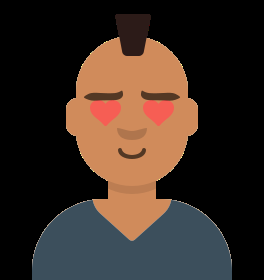

Traits: {"Hair Type": "MOHAWK", "Hair Color": "BLACK", "Facial Hair Type": "NONE", "Eye Type": "HEART", "Eyebrow Type": "FLAT_NATURAL", "Mouth Type": "TWINKLE", "Nose Type": "WIDE", "Skin Color": "BROWN", "Clothing Type": "SHIRT_V_NECK", "Clothing Color": "HEATHER", "Background Color": "DEFAULT", "Avatar Style": "TRANSPARENT"}


In [9]:
# Generate random avatars
avatars = [generate_random_python_avatar() for _ in range(3000)]
avatar_images = [a[0] for a in avatars]

# Convert to RGB vectors
rgb_vectors = np.array([png_bytes_to_rgb_vector(img) for img in avatar_images])

# Find 5 nearest neighbors for the first avatar
nbrs = NearestNeighbors(n_neighbors=4, algorithm='auto', metric='euclidean').fit(rgb_vectors)
distances, indices = nbrs.kneighbors([rgb_vectors[0]])

# Show first avatar
print("First avatar:")
display(IPyImage(avatar_images[0]))
print("Traits:", avatars[0][1])

# Show 5 nearest neighbors
print("5 nearest neighbors:")
for idx in indices[0][1:]:
    display(IPyImage(avatar_images[idx]))
    print("Traits:", avatars[idx][1])

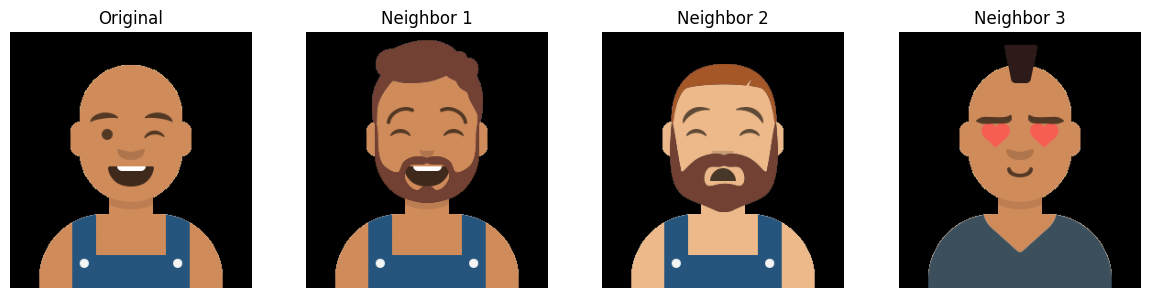

In [10]:
import matplotlib.pyplot as plt

# Get the first avatar and its 5 nearest neighbors
neighbor_indices = indices[0]  # includes the first avatar itself
all_indices = neighbor_indices  # 6 avatars: first + 5 neighbors

# Number of columns in the grid
n_cols = 4
n_rows = (len(all_indices) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*3, n_rows*3))

for i, idx in enumerate(all_indices):
    plt.subplot(n_rows, n_cols, i+1)
    img = PIL.Image.open(BytesIO(avatar_images[idx]))
    plt.imshow(img)
    plt.axis('off')
    if i == 0:
        plt.title("Original")
    else:
        plt.title(f"Neighbor {i}")

plt.tight_layout()
plt.show()


,Avatar Index,Avatar Image,Avatar Traits,Neighbor 1 Image,Neighbor 1 Traits,Neighbor 2 Image,Neighbor 2 Traits,Neighbor 3 Image,Neighbor 3 Traits,Neighbor 4 Image,Neighbor 4 Traits,Neighbor 5 Image,Neighbor 5 Traits
0,0,,"{""Hair Type"": ""NONE"", ""Hair Color"": ""BLONDE"", ""Facial Hair Type"": ""NONE"", ""Eye Type"": ""WINK"", ""Eyebrow Type"": ""DEFAULT_NATURAL"", ""Mouth Type"": ""BIG_SMILE"", ""Nose Type"": ""WIDE"", ""Skin Color"": ""BROWN"", ""Clothing Type"": ""OVERALL"", ""Clothing Color"": ""BLUE_03"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""SHORT_CURLY"", ""Hair Color"": ""BROWN"", ""Facial Hair Type"": ""BEARD_LIGHT"", ""Eye Type"": ""HAPPY"", ""Eyebrow Type"": ""RAISED_EXCITED"", ""Mouth Type"": ""BIG_SMILE"", ""Nose Type"": ""SMALL"", ""Skin Color"": ""BROWN"", ""Clothing Type"": ""OVERALL"", ""Clothing Color"": ""BLUE_03"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""CAESAR_SIDE_PART"", ""Hair Color"": ""AUBURN"", ""Facial Hair Type"": ""BEARD_MEDIUM"", ""Eye Type"": ""HAPPY"", ""Eyebrow Type"": ""RAISED_EXCITED_NATURAL"", ""Mouth Type"": ""DISBELIEF"", ""Nose Type"": ""DEFAULT"", ""Skin Color"": ""LIGHT"", ""Clothing Type"": ""OVERALL"", ""Clothing Color"": ""BLUE_03"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""MOHAWK"", ""Hair Color"": ""BLACK"", ""Facial Hair Type"": ""NONE"", ""Eye Type"": ""HEART"", ""Eyebrow Type"": ""FLAT_NATURAL"", ""Mouth Type"": ""TWINKLE"", ""Nose Type"": ""WIDE"", ""Skin Color"": ""BROWN"", ""Clothing Type"": ""SHIRT_V_NECK"", ""Clothing Color"": ""HEATHER"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""MOHAWK"", ""Hair Color"": ""RED"", ""Facial Hair Type"": ""BEARD_MEDIUM"", ""Eye Type"": ""WINK"", ""Eyebrow Type"": ""DEFAULT_NATURAL"", ""Mouth Type"": ""SERIOUS"", ""Nose Type"": ""DEFAULT"", ""Skin Color"": ""LIGHT"", ""Clothing Type"": ""OVERALL"", ""Clothing Color"": ""BLUE_03"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""SHORT_CURLY"", ""Hair Color"": ""BLACK"", ""Facial Hair Type"": ""EINSTEIN_MOUSTACHE"", ""Eye Type"": ""SIDE"", ""Eyebrow Type"": ""ANGRY_NATURAL"", ""Mouth Type"": ""SAD"", ""Nose Type"": ""DEFAULT"", ""Skin Color"": ""DARK_BROWN"", ""Clothing Type"": ""OVERALL"", ""Clothing Color"": ""HEATHER"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}"
1,1,,"{""Hair Type"": ""BRIDE"", ""Hair Color"": ""AUBURN"", ""Facial Hair Type"": ""NONE"", ""Eye Type"": ""EYE_ROLL"", ""Eyebrow Type"": ""UNIBROW_NATURAL"", ""Mouth Type"": ""BIG_SMILE"", ""Nose Type"": ""DEFAULT"", ""Skin Color"": ""LIGHT"", ""Clothing Type"": ""GRAPHIC_SHIRT"", ""Clothing Color"": ""GRAY_02"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""BRIDE"", ""Hair Color"": ""AUBURN"", ""Facial Hair Type"": ""NONE"", ""Eye Type"": ""SURPRISED"", ""Eyebrow Type"": ""UP_DOWN_NATURAL"", ""Mouth Type"": ""DISBELIEF"", ""Nose Type"": ""DEFAULT"", ""Skin Color"": ""YELLOW"", ""Clothing Type"": ""SHIRT_CREW_NECK"", ""Clothing Color"": ""GRAY_02"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""BRIDE"", ""Hair Color"": ""BROWN_DARK"", ""Facial Hair Type"": ""NONE"", ""Eye Type"": ""HEART"", ""Eyebrow Type"": ""UNIBROW_NATURAL"", ""Mouth Type"": ""BIG_SMILE"", ""Nose Type"": ""WIDE"", ""Skin Color"": ""TANNED"", ""Clothing Type"": ""HOODIE"", ""Clothing Color"": ""GRAY_02"", ""Background Color"": ""DEFAULT"", ""Avatar Style"": ""TRANSPARENT""}",,"{""Hair Type"": ""SHORT_WAVED"", ""Hair Color"": ""BROWN"", ""Facial Hair Type"": ""EINSTEIN_MOUSTACHE"", ""Eye Type"": ""EYE_ROLL"", ""Eyebrow Type"": ""UP_DOWN"", ""Mouth Type"": ""CONCERNED"", ""Nose Type"": ""SMALL"", ""Skin Color"": ""BROWN"", ""Clothing Type"": ""GRAPHIC_SHIRT"", ""Clothing Color"": ""GRAY_02"", ""Backgroun
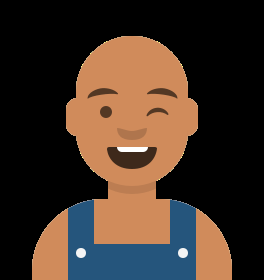
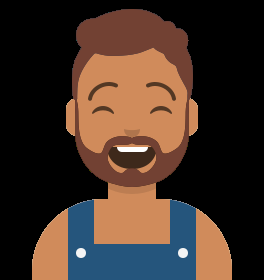
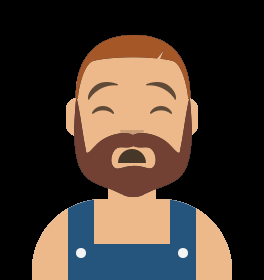
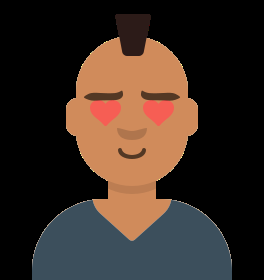
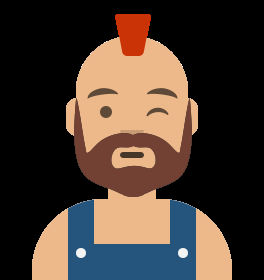
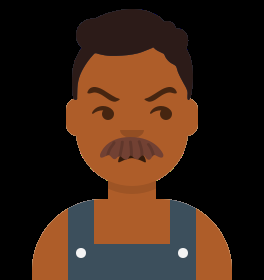
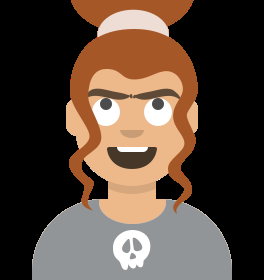
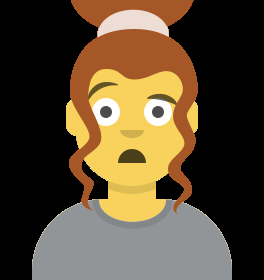
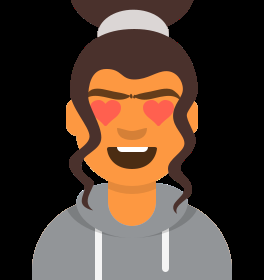
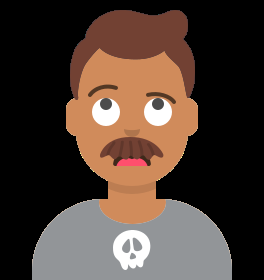
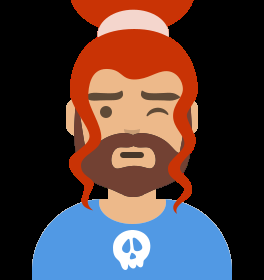
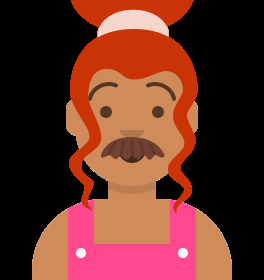
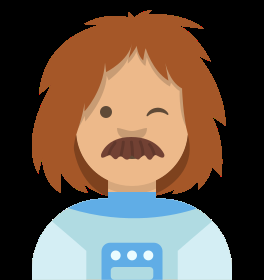
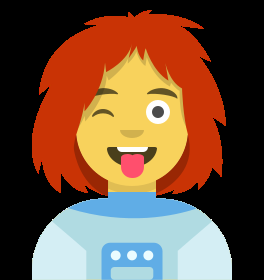
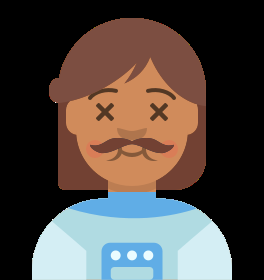
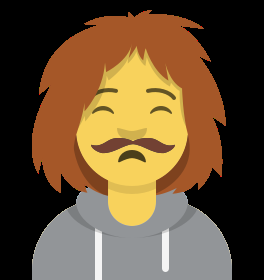
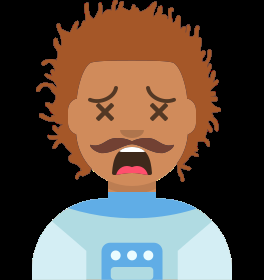
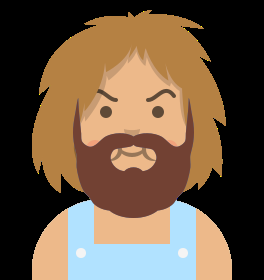
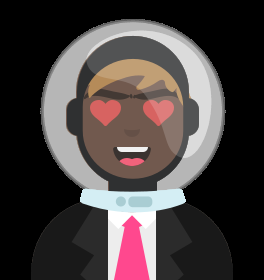
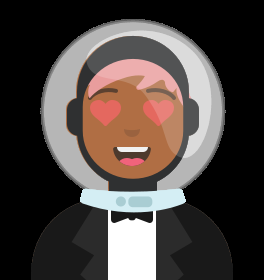
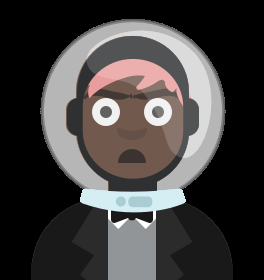
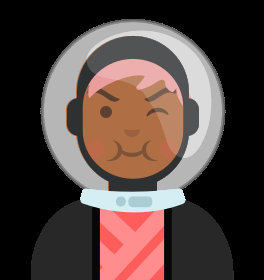
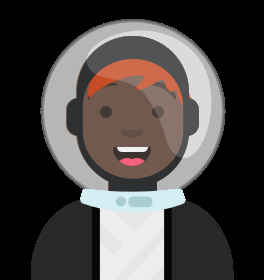
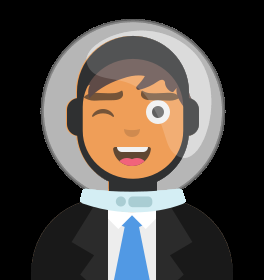
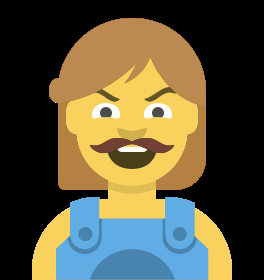
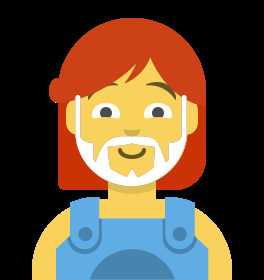
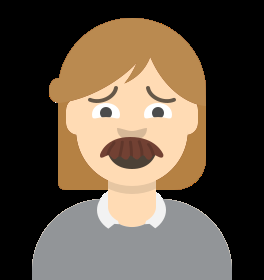
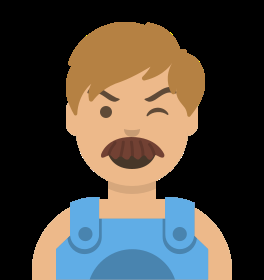
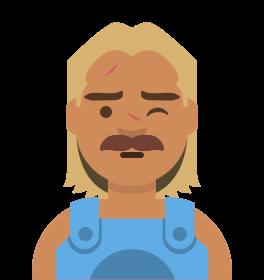
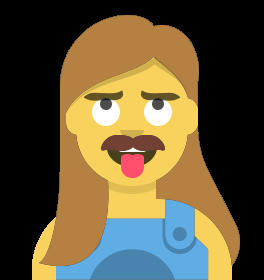

In [11]:
import pandas as pd
import base64
from sklearn.neighbors import NearestNeighbors
from IPython.display import display, HTML

# Number of neighbors
n_neighbors = 5

# Convert avatar images to RGB vectors
rgb_vectors = np.array([png_bytes_to_rgb_vector(img) for img in avatar_images])

# Fit nearest neighbors model
nbrs = NearestNeighbors(n_neighbors=n_neighbors+1, algorithm='auto', metric='euclidean').fit(rgb_vectors)
distances, indices = nbrs.kneighbors(rgb_vectors)  # get neighbors for all avatars

# Helper function to convert PNG bytes to HTML <img>
def img_to_html(img_bytes, width=80):
    return f'<img src="data:image/png;base64,{base64.b64encode(img_bytes).decode()}" width="{width}">'

# Build DataFrame
rows = []
for idx, (img_bytes, traits_json) in enumerate(avatars):
    row = {
        "Avatar Index": idx,
        "Avatar Image": img_to_html(img_bytes),
        "Avatar Traits": traits_json
    }
    # Add neighbor columns
    for n, neighbor_idx in enumerate(indices[idx][1:], start=1):  # skip the avatar itself
        row[f"Neighbor {n} Image"] = img_to_html(avatar_images[neighbor_idx])
        row[f"Neighbor {n} Traits"] = avatars[neighbor_idx][1]
    rows.append(row)

df_neighbors_all = pd.DataFrame(rows)

# Display DataFrame with images
display(HTML(df_neighbors_all.head().to_html(escape=False)))
